<a href="https://colab.research.google.com/github/Nduskii/stock-analysis-machine-learning-stock-prediction/blob/main/apple_stock_market1980_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read dataset
# The dataset used is the Kaggle Apple Stock Market Historical Data (1980-2024)

df=pd.read_csv('AAPL_historical_data.csv')

In [ ]:
df

,Open,High,Low,Close
0,0.098834,0.099264,0.098834,0.098834
1,0.094108,0.094108,0.093678,0.093678
2,0.087232,0.087232,0.086802,0.086802
3,0.088951,0.089381,0.088951,0.088951
4,0.091530,0.091959,0.091530,0.091530
...,...,...,...,...
11089,241.830002,247.240005,241.750000,246.750000
11090,246.889999,248.210007,245.339996,247.770004
11091,247.960007,250.800003,246.259995,246.490005
11092,246.889999,248.740005,245.679993,247.960007


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11094 non-null  object 
 1   Open    11094 non-null  float64
 2   High    11094 non-null  float64
 3   Low     11094 non-null  float64
 4   Close   11094 non-null  float64
dtypes: float64(4), object(1)
memory usage: 433.5+ KB


In [ ]:
#check for null values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
#check for duplicates
df.duplicated().sum()

0

In [ ]:
#check for garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts)
  print('***'*10)

<bound method IndexOpsMixin.value_counts of 0        1980-12-12 00:00:00-05:00
1        1980-12-15 00:00:00-05:00
2        1980-12-16 00:00:00-05:00
3        1980-12-17 00:00:00-05:00
4        1980-12-18 00:00:00-05:00
                   ...            
11089    2024-12-09 00:00:00-05:00
11090    2024-12-10 00:00:00-05:00
11091    2024-12-11 00:00:00-05:00
11092    2024-12-12 00:00:00-05:00
11093    2024-12-13 00:00:00-05:00
Name: Date, Length: 11094, dtype: object>
******************************


In [ ]:
#EDA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,11094.0,23.236654,49.129620,0.038245,0.242896,0.442782,18.083088,247.960007
High,11094.0,23.484468,49.645173,0.038245,0.248067,0.451501,18.278464,250.800003
Low,11094.0,23.001626,48.654514,0.037815,0.237920,0.435876,17.904287,246.259995
Close,11094.0,23.254564,49.178271,0.037815,0.242953,0.444634,18.107803,248.130005


In [ ]:
  df.describe(include='object')

,Date
count,11094
unique,11094
top,1980-12-12 00:00:00-05:00
freq,1


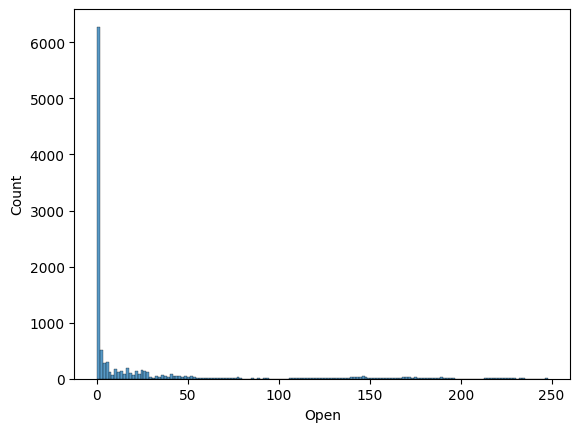

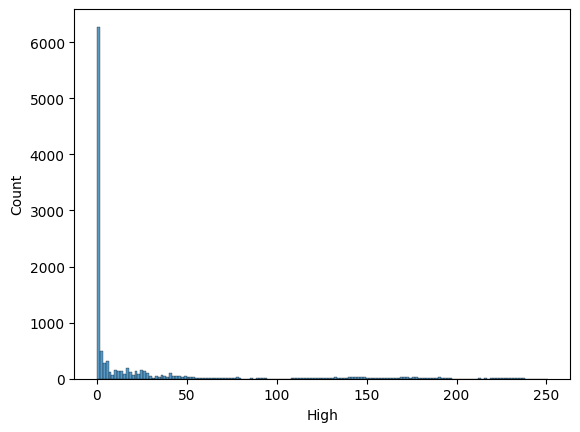

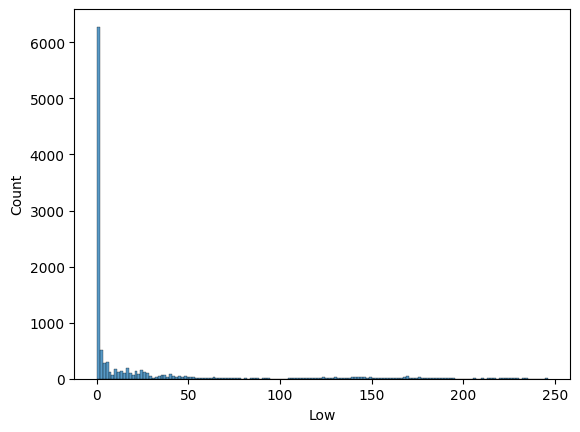

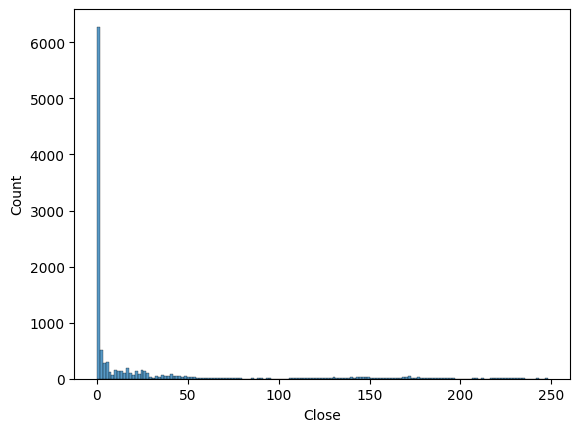

In [ ]:
#histograms for numeric data
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

<Axes: >

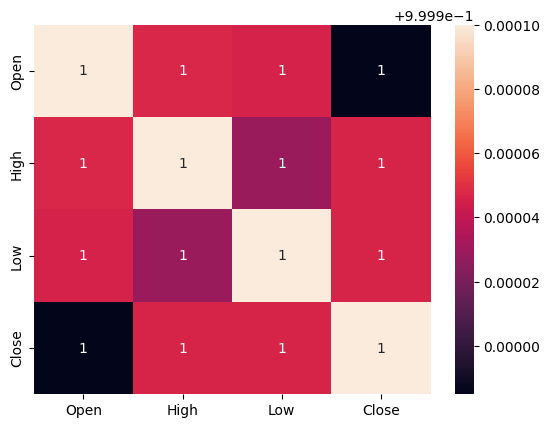

In [ ]:
#correlation
c=df.select_dtypes('number').corr()
sns.heatmap(c,annot=True)

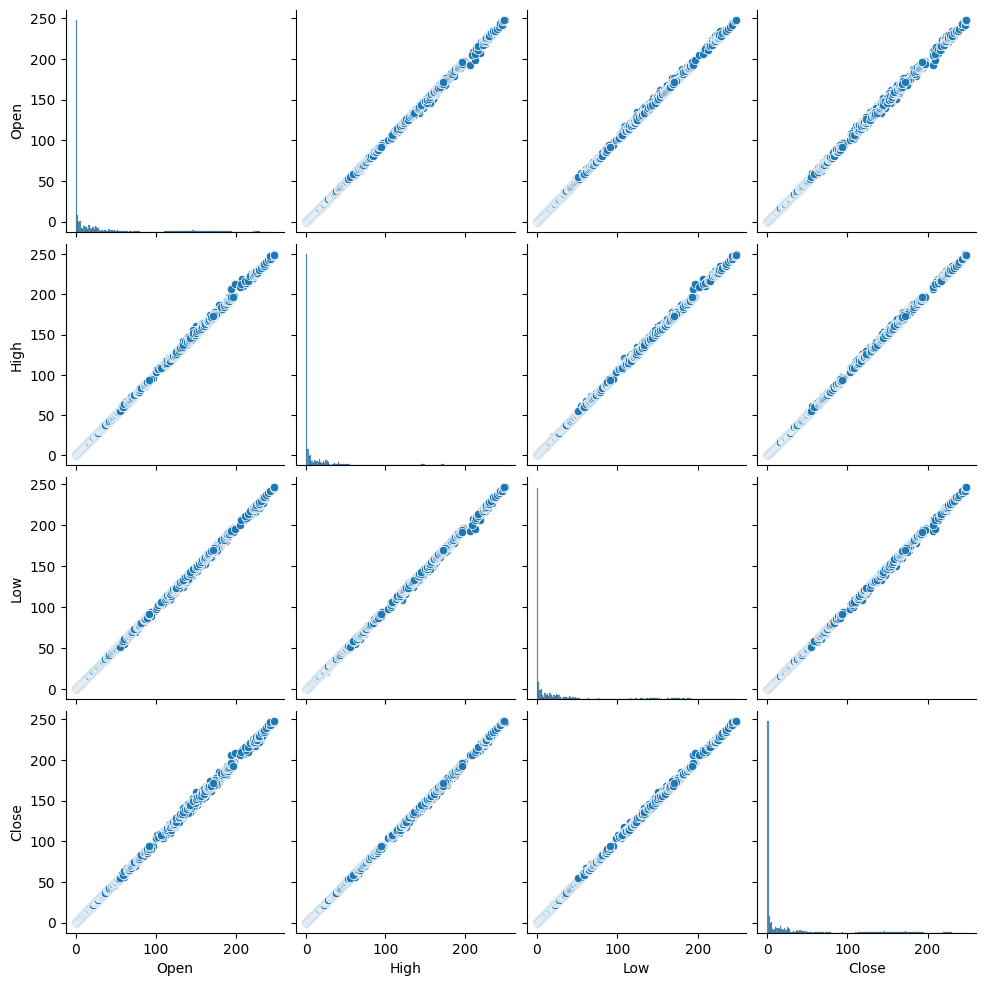

In [ ]:
sns.pairplot(df)

In [ ]:
#assess multicollinearity using vif
df_=df.copy()
#import vif library
from statsmodels.stats.outliers_influence import variance_inflation_factor

#function to caclulate vif
def calculate_vif(dataset):
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_value']=[variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
  return vif

In [ ]:
#get vif
features= df_.iloc[:,1:-1]
calculate_vif(features)

,features,VIF_value
0,Open,17093.888778
1,High,13071.058086
2,Low,12754.803597


In [ ]:
#check which variable has the higher correlation
df_.select_dtypes(include='number').corr()

,Open,High,Low,Close
Open,1.000000,0.999947,0.999946,0.999885
High,0.999947,1.000000,0.999929,0.999947
Low,0.999946,0.999929,1.000000,0.999946
Close,0.999885,0.999947,0.999946,1.000000


In [ ]:
df_=df_.drop(['Open'],axis=1)
features= df_.iloc[:,1:-1]
calculate_vif(features)



,features,VIF_value
0,High,8638.122207
1,Low,8638.122207


In [ ]:
df_.select_dtypes(include='number').corr()

,High,Low,Close
High,1.000000,0.999929,0.999947
Low,0.999929,1.000000,0.999946
Close,0.999947,0.999946,1.000000


In [ ]:
#visualizations
#saving plots
def save_plots(title):
  plt.legend()
  plt.title(title)
  plt.tight_layout()
  plt.show()

In [ ]:
#converting date column dtype and using it as the index
df_=df.copy()
df_['Date']=pd.to_datetime(df_['Date'],utc=True)
df_.set_index('Date',inplace=True)


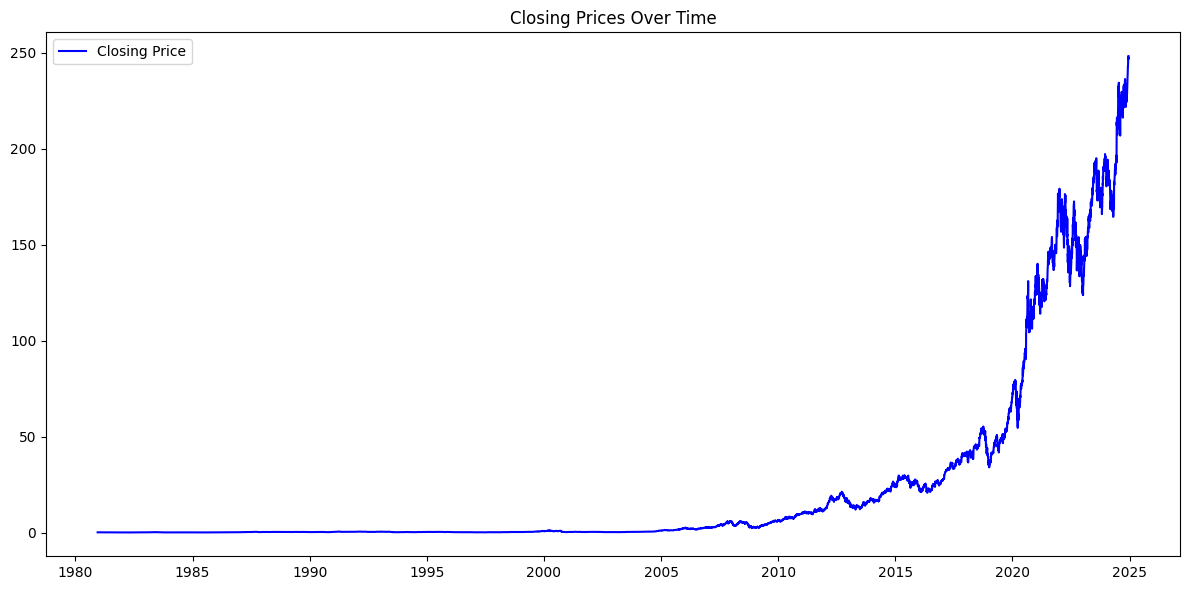

In [ ]:
#line plot of closing prices over time
plt.figure(figsize=(12,6))
plt.plot(df_.index, df_['Close'], label='Closing Price', color='blue')
save_plots("Closing Prices Over Time")

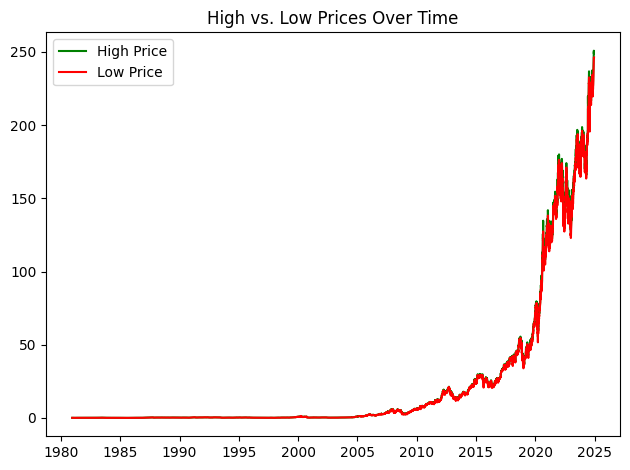

In [ ]:
#high vs low stock prices per day
plt.plot(df_.index, df_['High'], label='High Price', color='green')
plt.plot(df_.index, df_['Low'], label='Low Price', color='red')
save_plots("High vs. Low Prices Over Time")

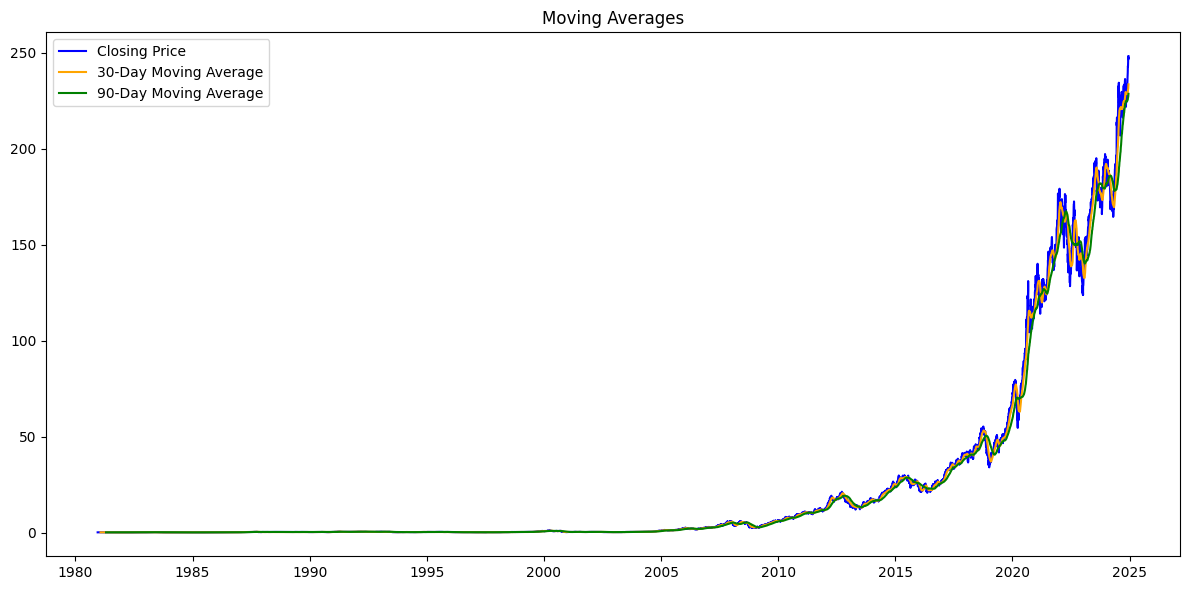

In [ ]:
# Moving Averages
df_['30-Day MA'] = df_['Close'].rolling(window=30).mean()
df_['90-Day MA'] = df_['Close'].rolling(window=90).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_.index, df_['Close'], label='Closing Price', color='blue')
plt.plot(df_.index, df_['30-Day MA'], label='30-Day Moving Average', color='orange')
plt.plot(df_.index, df_['90-Day MA'], label='90-Day Moving Average', color='green')
save_plots("Moving Averages")

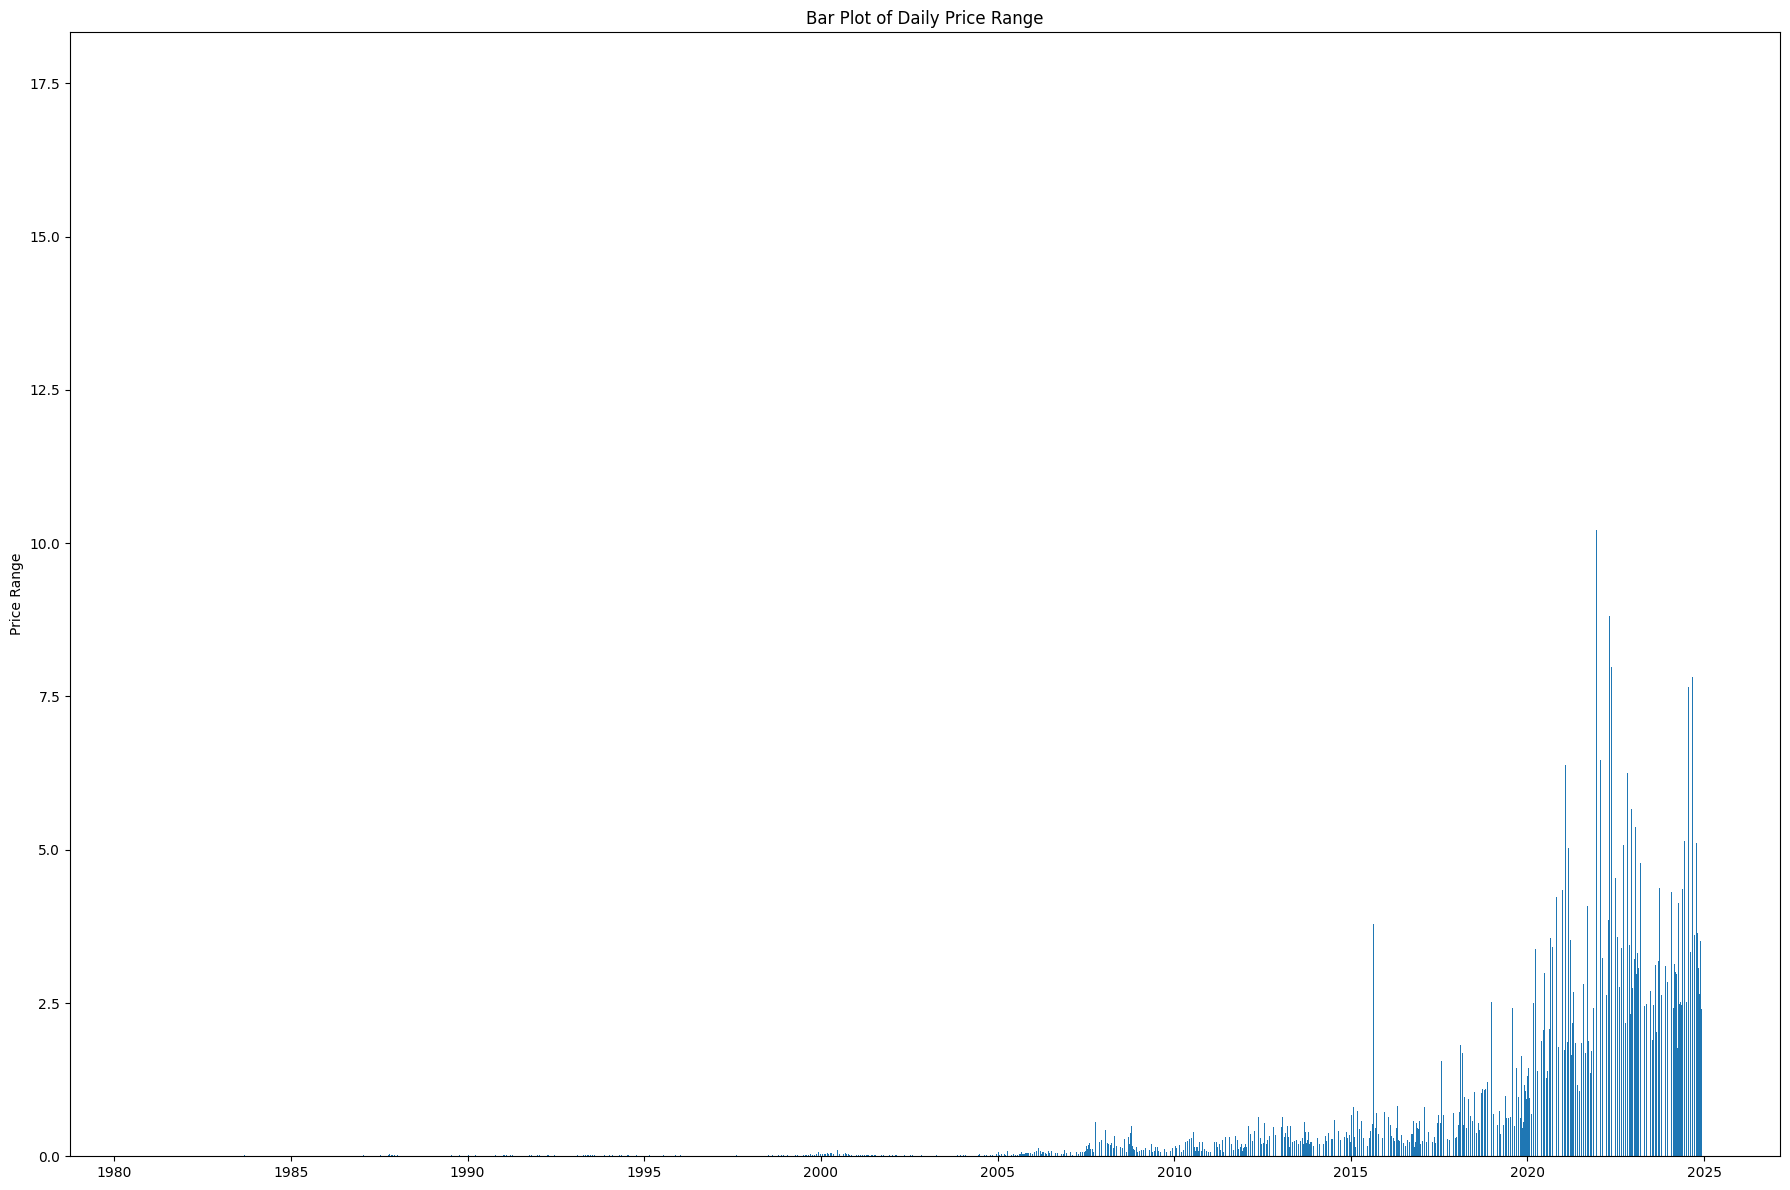

In [ ]:
# Bar Plot of Daily Price Range
df_['Price Range'] = df_['High'] - df_['Low']
plt.figure(figsize=(18, 12))
plt.bar(x=df_.index,height=df_['Price Range'])
plt.title("Bar Plot of Daily Price Range")
plt.ylabel("Price Range")
plt.tight_layout()
plt.show()

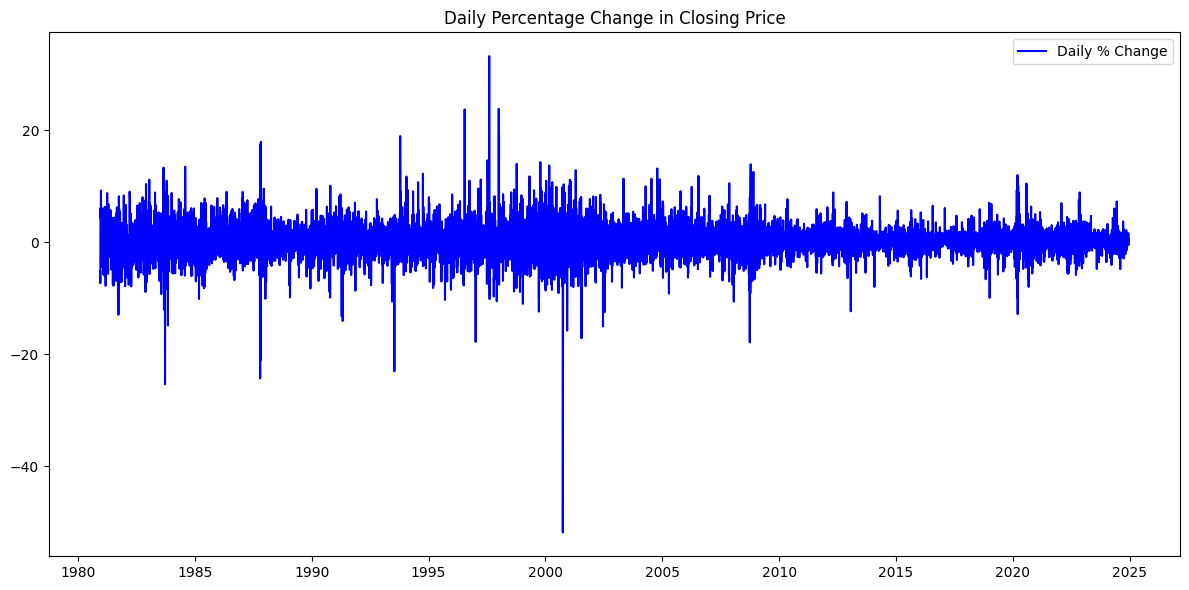

In [ ]:
# `Daily Percentage Change in Closing Price
df_['Daily Change %'] = df_['Close'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.plot(df_.index, df_['Daily Change %'], label='Daily % Change', color='blue')
save_plots("Daily Percentage Change in Closing Price")

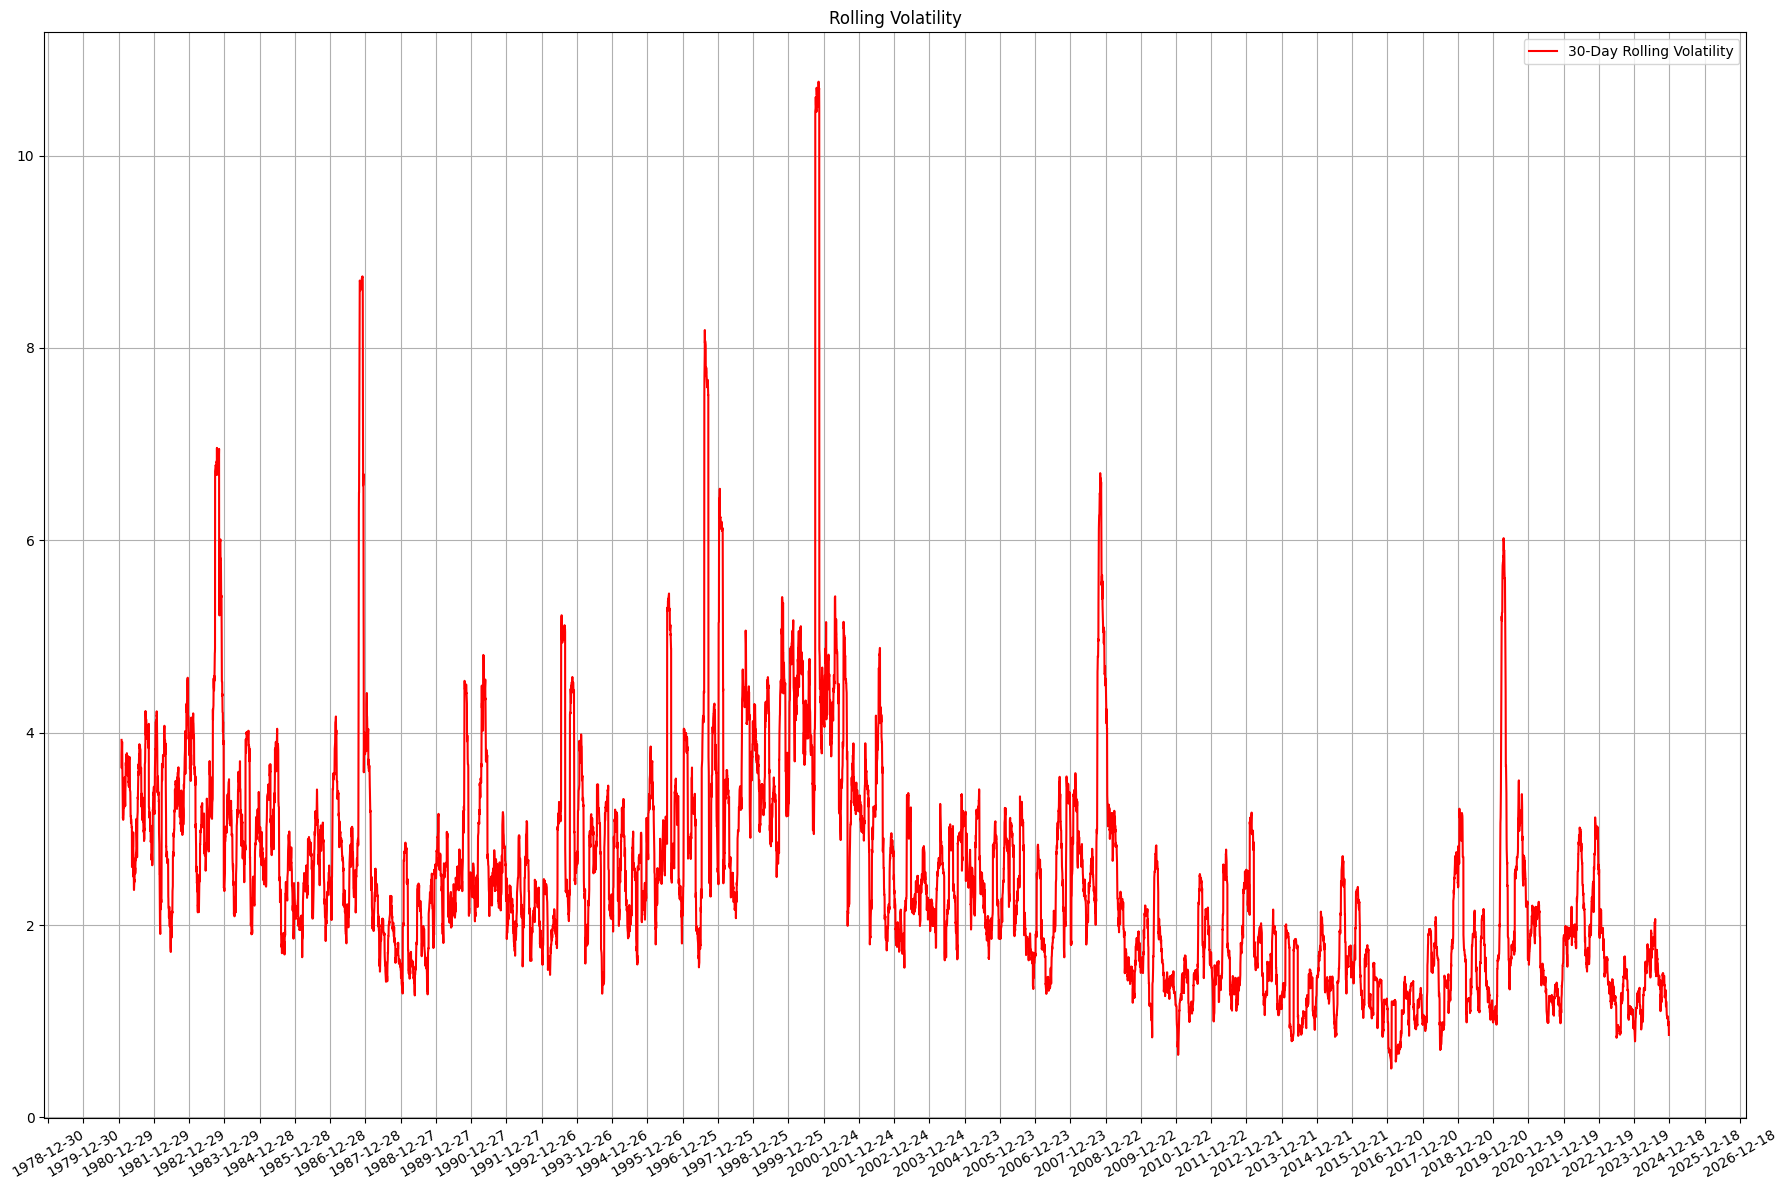

In [ ]:
from matplotlib.ticker import MultipleLocator

# Rolling Volatility

df_['30-Day Volatility'] = df_['Close'].pct_change().rolling(window=30).std() * 100
plt.figure(figsize=(18, 12))
plt.plot(df_.index, df_['30-Day Volatility'], label='30-Day Rolling Volatility', color='red')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(365))
plt.xticks(rotation=30)
plt.grid(True)
save_plots("Rolling Volatility")

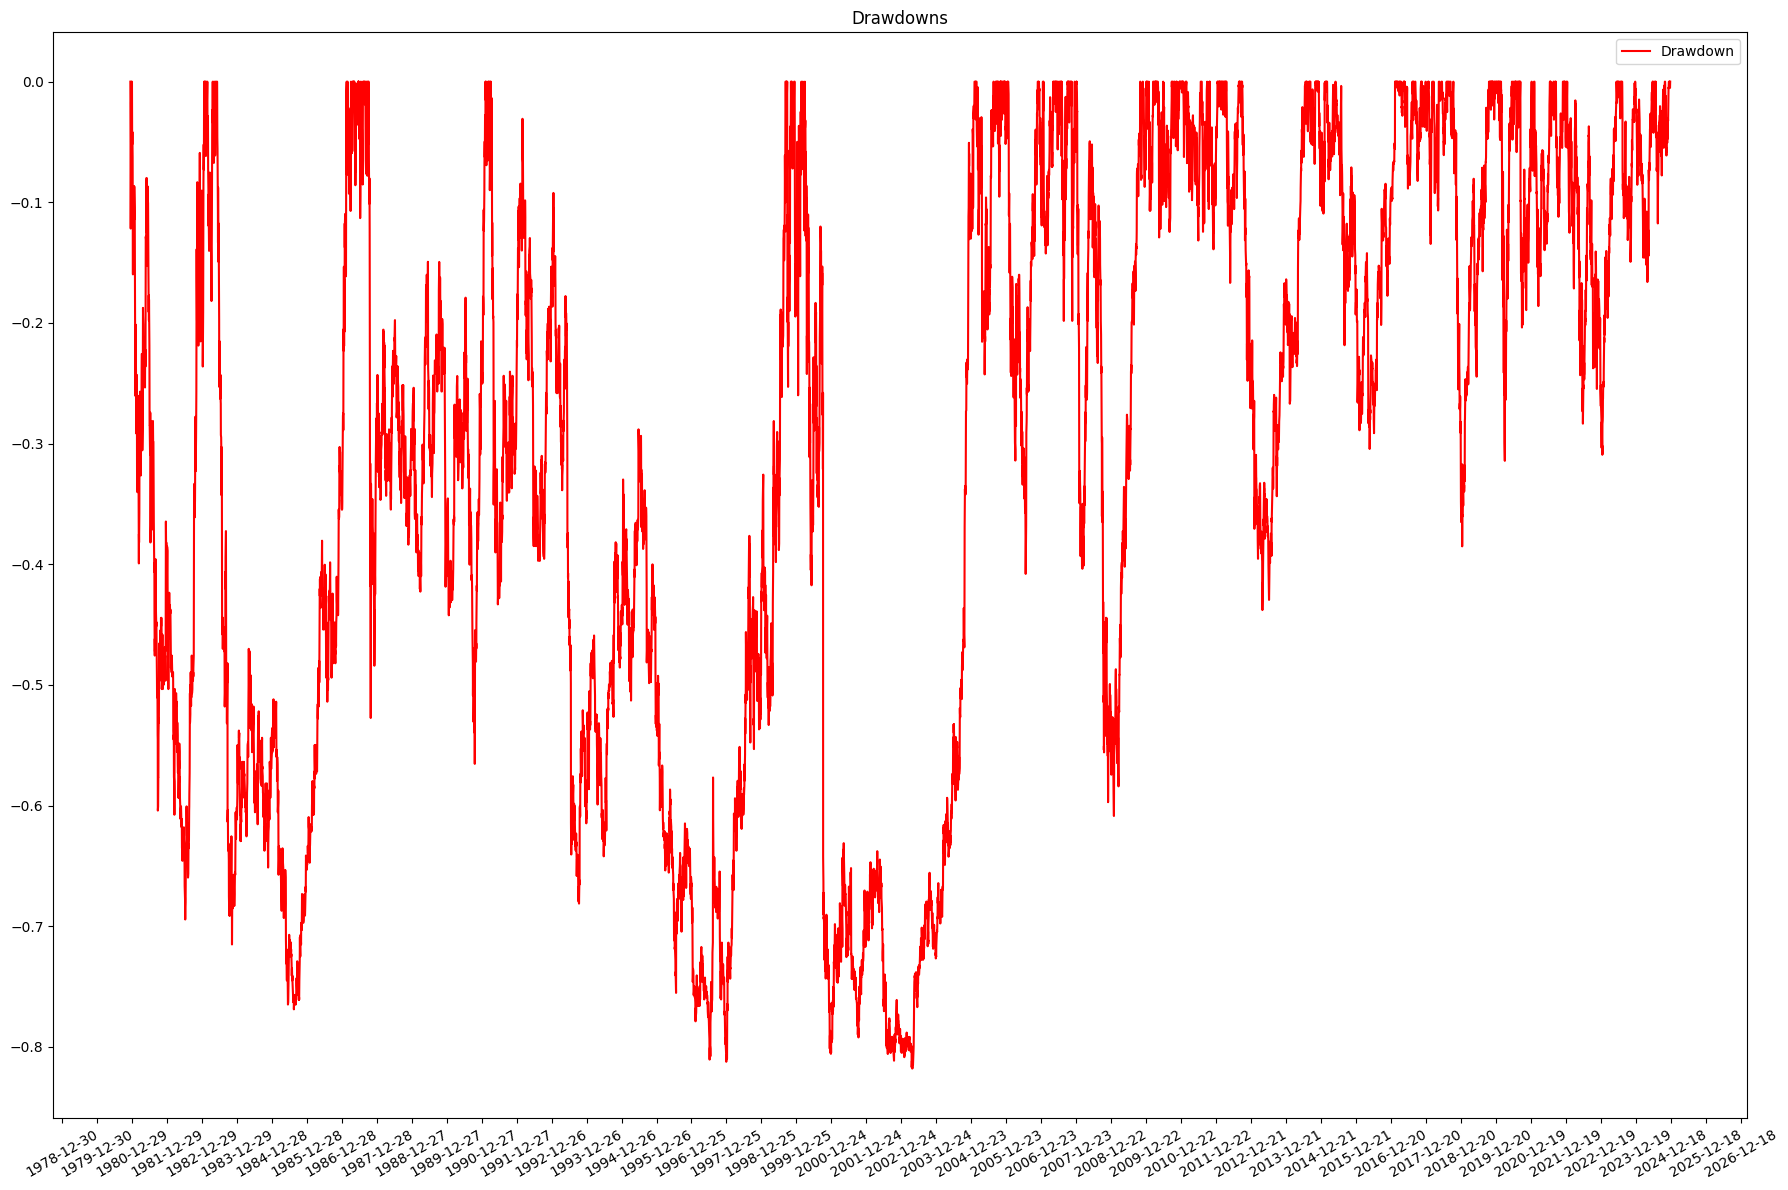

In [ ]:
# Drawdowns
df_['Peak'] = df_['Close'].cummax()
df_['Drawdown'] = (df_['Close'] - df_['Peak']) / df_['Peak']
plt.figure(figsize=(18, 12))
plt.plot(df_.index, df_['Drawdown'], label='Drawdown', color='red')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(365))
plt.xticks(rotation=30)
save_plots("Drawdowns")

In [ ]:
#distinguishing years months and days
df['Date']=pd.to_datetime(df['Date'],utc=True)
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day

In [ ]:
df.sample(5)

,Date,Open,High,Low,Close,Year,Month,Day
10511,2022-08-22 04:00:00+00:00,167.646034,167.813984,165.126746,165.551575,2022,8,22
320,1982-03-22 05:00:00+00:00,0.061449,0.061879,0.061449,0.061449,1982,3,22
4630,1999-04-09 04:00:00+00:00,0.273023,0.280555,0.270670,0.276789,1999,4,9
4813,1999-12-29 05:00:00+00:00,0.729160,0.769642,0.719275,0.758346,1999,12,29
4090,1997-02-14 05:00:00+00:00,0.122389,0.123331,0.120507,0.122860,1997,2,14


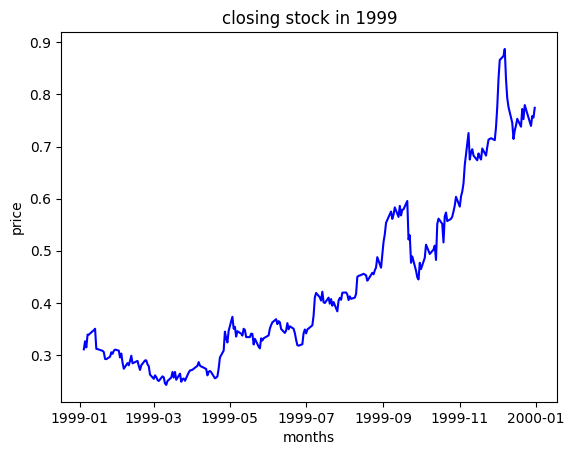

In [ ]:
#closing stock during years with high volatility
plt.plot(df[df.Year==1999]['Date'],df[df.Year==1999]['Close'],color='blue')
plt.xlabel('months')
plt.ylabel('price')
plt.title('closing stock in 1999')
plt.show()

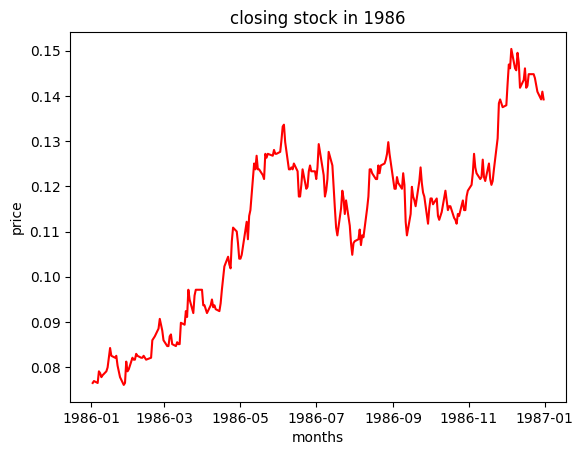

In [ ]:
plt.plot(df[df.Year==1986]['Date'],df[df.Year==1986]['Close'],color='red')
plt.xlabel('months')
plt.ylabel('price')
plt.title('closing stock in 1986')
plt.show()

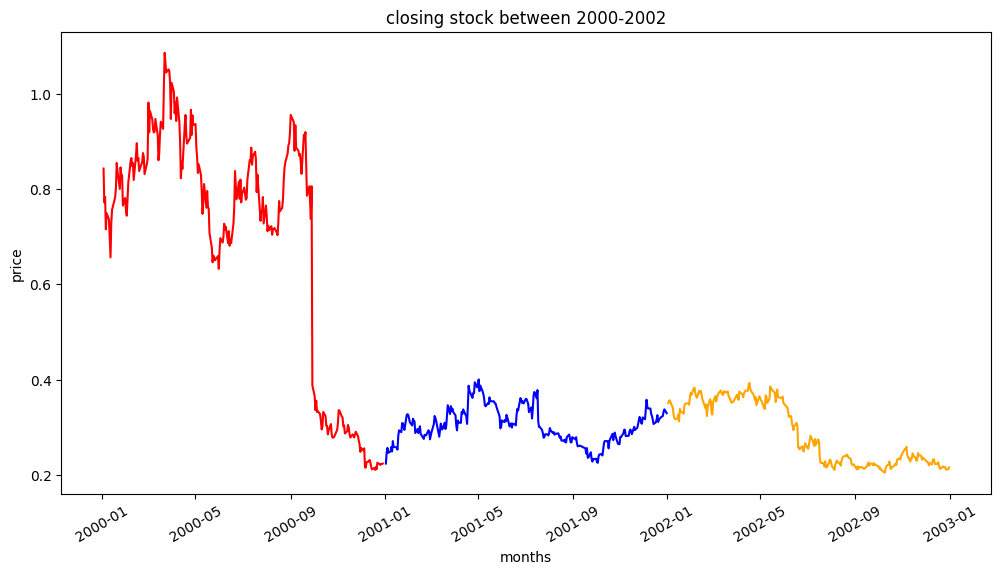

In [ ]:
#closing stock during years with high drawdown
plt.figure(figsize=(12,6))
plt.plot(df[df.Year==2000]['Date'],df[df.Year==2000]['Close'],color='red')
plt.plot(df[df.Year==2001]['Date'],df[df.Year==2001]['Close'],color='blue')
plt.plot(df[df.Year==2002]['Date'],df[df.Year==2002]['Close'],color='orange')
plt.xlabel('months')
plt.ylabel('price')
plt.xticks(rotation=30)
plt.title('closing stock between 2000-2002')
plt.show()


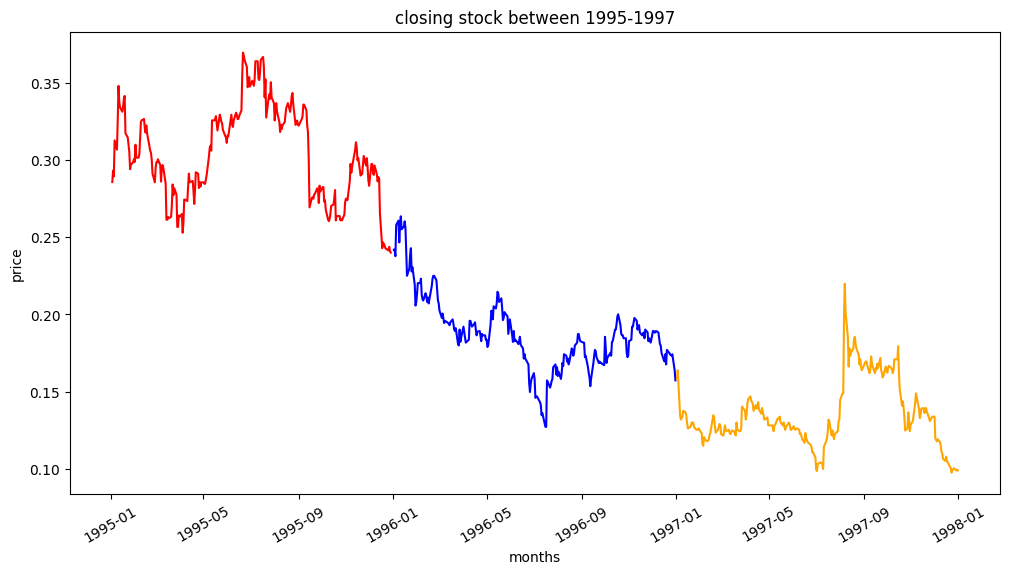

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df[df.Year==1995]['Date'],df[df.Year==1995]['Close'],color='red')
plt.plot(df[df.Year==1996]['Date'],df[df.Year==1996]['Close'],color='blue')
plt.plot(df[df.Year==1997]['Date'],df[df.Year==1997]['Close'],color='orange')
plt.xlabel('months')
plt.ylabel('price')
plt.xticks(rotation=30)
plt.title('closing stock between 1995-1997')
plt.show()


Machine Learning


In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

<Axes: xlabel='Close', ylabel='Density'>

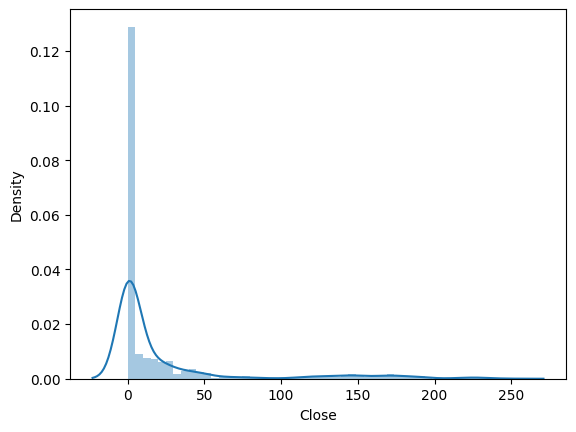

In [ ]:
#checking for outliers
sns.distplot(df['Close']) #checking for skewness

<Axes: ylabel='Close'>

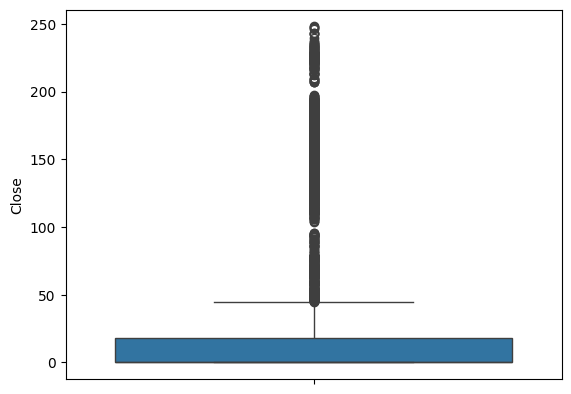

In [ ]:
sns.boxplot(df['Close'])

In [ ]:
# Detecting Outliers using IQR
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]
outliers


,Open,High,Low,Close
9448,44.576390,45.114653,44.519480,45.109913
9449,45.441877,45.863952,45.373114,45.486931
9450,45.780961,45.987255,45.612603,45.837868
9451,45.913756,46.020460,45.508277,45.996746
9452,46.034677,46.048903,45.607858,45.873436
...,...,...,...,...
11089,241.830002,247.240005,241.750000,246.750000
11090,246.889999,248.210007,245.339996,247.770004
11091,247.960007,250.800003,246.259995,246.490005
11092,246.889999,248.740005,245.679993,247.960007


In [ ]:
#Training models without outliers to compare performance

#split data into traning, validation and test data
train,test=np.split(df.sample(frac=1),[int(0.8*len(df))])

In [ ]:
#scaling the data

def scale_data(dataframe):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  y=scaler.fit_transform(y.reshape(-1,1))
  data=np.hstack((x,np.reshape(y,(-1,1))))
  data_=pd.DataFrame(data,columns=dataframe.columns)
  return data_,x,y


In [ ]:
train,x_train,y_train=scale_data(train)
test,x_test,y_test=scale_data(test)

In [ ]:
train.describe()

,Open,High,Low,Close
count,8.875000e+03,8.875000e+03,8.875000e+03,8.875000e+03
mean,8.046146e-17,1.240948e-17,7.445687e-17,6.404892e-18
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-4.735015e-01,-4.735925e-01,-4.732970e-01,-4.734188e-01
25%,-4.693226e-01,-4.693534e-01,-4.691766e-01,-4.692348e-01
50%,-4.653181e-01,-4.653418e-01,-4.651568e-01,-4.652353e-01
75%,-1.049546e-01,-1.053007e-01,-1.040631e-01,-1.046653e-01
max,4.548328e+00,4.553798e+00,4.563061e+00,4.540126e+00


In [ ]:
# Using a Linear Regression model to predict closing stock
# This script processes historical stock prices to predict the closing stock
# based on opening,high and low stock prices per day.
# The target variable is "Close".

reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#cross validation rmse using 5 folds
cv_scores = cross_val_score(reg_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE for each fold: {cv_rmse}')
print(f'Mean cross-validated RMSE: {cv_rmse.mean()}')

Cross-validated RMSE for each fold: [0.00561215 0.00677505 0.00690952 0.00771293 0.00708666]
Mean cross-validated RMSE: 0.006819261844298145


In [ ]:
#testing its performance on the test data (R2)-correlation
y_pred=reg_model.predict(x_test)
reg_model.score(x_test,y_test)

0.9999561247489122

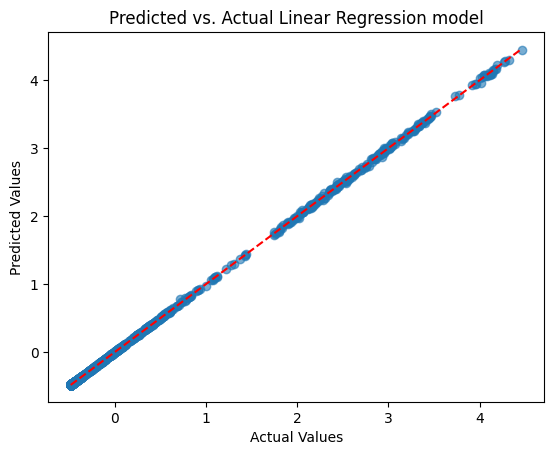

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Linear Regression model")
plt.show()


In [ ]:
# Using a Support Vector Machine model to predict closing stock
# This script processes historical stock prices to predict the closing stock
# based on opening,high and low stock prices per day.
# The target variable is "Close"

svm_model= SVR()
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(f'mse:{mse}')

mse:0.007466747821019569


In [ ]:
#cross validation rmse using 5 folds
cv_scores = cross_val_score(svm_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE for each fold: {cv_rmse}')
print(f'Mean cross-validated RMSE: {cv_rmse.mean()}')

Cross-validated RMSE for each fold: [0.0789288  0.07922838 0.07999096 0.07764595 0.07861018]
Mean cross-validated RMSE: 0.07888085477430895


In [ ]:
#r2
r2=r2_score(y_test,y_pred)
print(f'r2:{r2}')

r2:0.9925332521789805


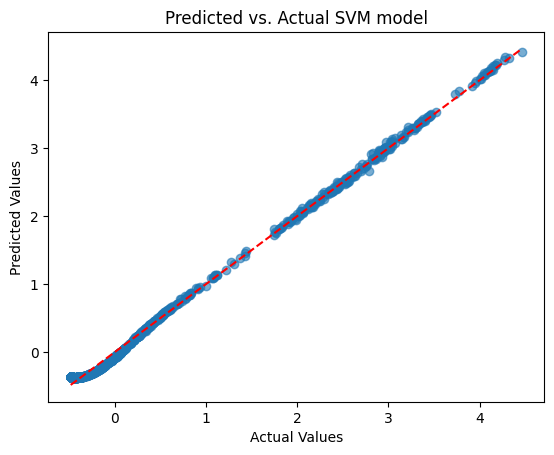

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual SVM model")
plt.show()

In [ ]:
# Using a K-Nearest Neighbors (KNN)  model to predict closing stock
# This script processes historical stock prices to predict the closing stock
# based on opening,high and low stock prices per day.
# The target variable is "Close"
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
print(f'mean_squared_error:{mse}')
rmse= np.sqrt(mse)
print(f'rmse:{rmse}')
r2=r2_score(y_test,y_pred)
print(f'r2:{r2}')


mean_squared_error:9.334424172430348e-05
rmse:0.00966148237716674
r2:0.9999066557582756


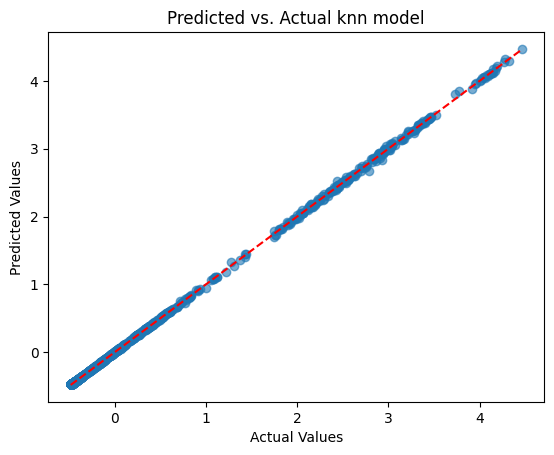

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual knn model")
plt.show()

In [ ]:
# Using a Random Forest model to predict closing stock
# This script processes historical stock prices to predict the closing stock
# based on opening,high and low stock prices per day.
# The target variable is "Close"

rf_model=RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
rf_model.score(x_test,y_test)

0.9999075451027557

In [ ]:
#cross validation rmse using 5 folds
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE for each fold: {cv_rmse}')
print(f'Mean cross-validated RMSE: {cv_rmse.mean()}')

Cross-validated RMSE for each fold: [0.0078739  0.00905967 0.01024947 0.00995491 0.00930117]
Mean cross-validated RMSE: 0.009287823505912993


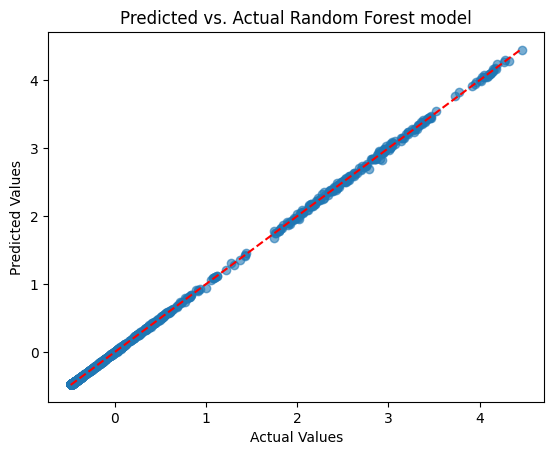

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Random Forest model")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Performing grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", -grid_search.best_score_)

# Trainning with best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

# Evaluation
mse= mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
print(f'rmse:{rmse}')
print(f"R-squared (R²): {r2_score(y_test, y_pred):.2f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 8.568818581717013e-05
rmse:0.009644714270303884
R-squared (R²): 1.00


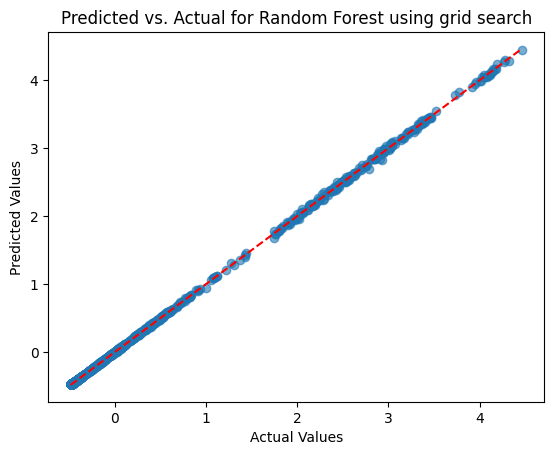

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual for Random Forest using grid search")
plt.show()

In [ ]:
# Training models with outliers to compare performance

from sklearn.model_selection import train_test_split
x= df[['Open','High','Low']].values
y= df['Close'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Using a Linear Regression model to predict closing stock
# This script processes historical stock prices to predict the closing stock
# based on opening,high and low stock prices per day.
# The target variable is "Close".

reg_model_unscaled=LinearRegression()
reg_model_unscaled.fit(x_train,y_train)

LinearRegression()

In [ ]:
#cross validation rmse using 5 folds
cv_scores = cross_val_score(reg_model_unscaled, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE for each fold: {cv_rmse}')
print(f'Mean cross-validated RMSE: {cv_rmse.mean()}')

Cross-validated RMSE for each fold: [0.38517835 0.32887365 0.30879265 0.30888186 0.35269694]
Mean cross-validated RMSE: 0.3368846906452413


In [ ]:
#testing its performance on the test data (R2)-correlation
y_pred=reg_model_unscaled.predict(x_test)
reg_model_unscaled.score(x_test,y_test)

0.999957118724295

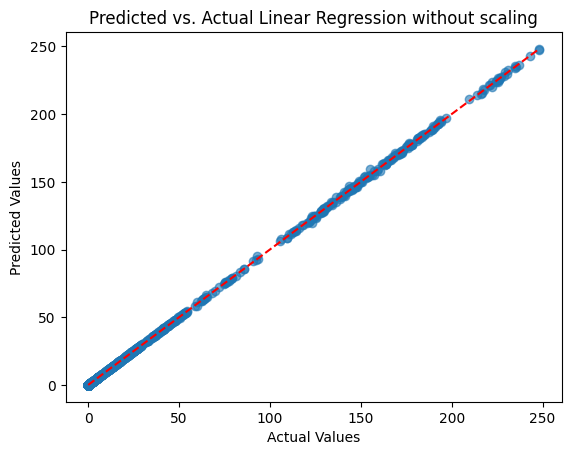

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Linear Regression without scaling")
plt.show()

In [ ]:
# Using a K-Nearest Neighbors (KNN)  model to predict closing stock
# This script processes historical stock prices to predict the closing stock
# based on opening,high and low stock prices per day.
# The target variable is "Close"
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
print(f'mean_squared_error:{mse}')
rmse= np.sqrt(mse)
print(f'rmse:{rmse}')
r2=r2_score(y_test,y_pred)
print(f'r2:{r2}')


mean_squared_error:0.18247743385327092
rmse:0.4271737747723646
r2:0.9999251539772667


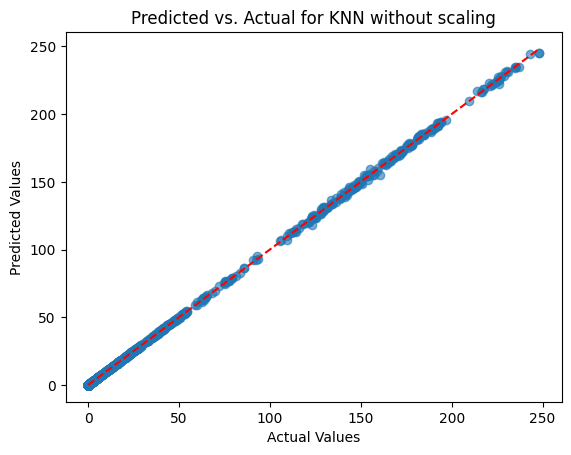

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual for KNN without scaling")
plt.show()

In [ ]:
# Using a Support Vector Machine model to predict closing stock
# This script processes historical stock prices to predict the closing stock
# based on opening,high and low stock prices per day.
# The target variable is "Close"

svm_model= SVR()
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(f'mse:{mse}')

mse:11.670635287381602


In [ ]:
#cross validation rmse using 5 folds
cv_scores = cross_val_score(svm_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE for each fold: {cv_rmse}')
print(f'Mean cross-validated RMSE: {cv_rmse.mean()}')

Cross-validated RMSE for each fold: [3.819236   2.40159985 3.50235806 4.12764506 3.84195037]
Mean cross-validated RMSE: 3.5385578694123536


In [ ]:
#r2
r2=r2_score(y_test,y_pred)
print(f'r2:{r2}')

r2:0.995213103255639


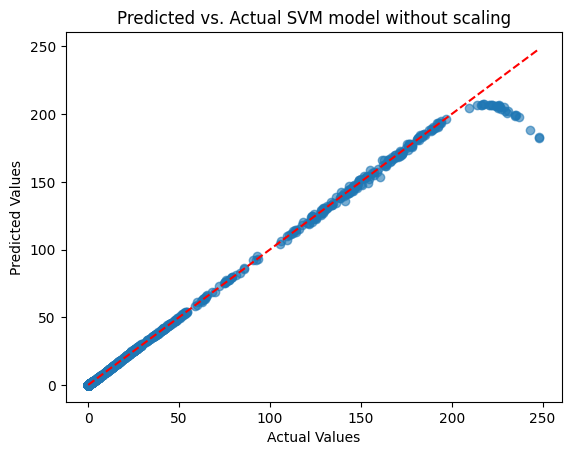

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual SVM model without scaling")
plt.show()

In [ ]:
# Using a Random Forest model to predict closing stock
# This script processes historical stock prices to predict the closing stock
# based on opening,high and low stock prices per day.
# The target variable is "Close"

rf_model=RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
rf_model.score(x_test,y_test)

0.9999275714816945

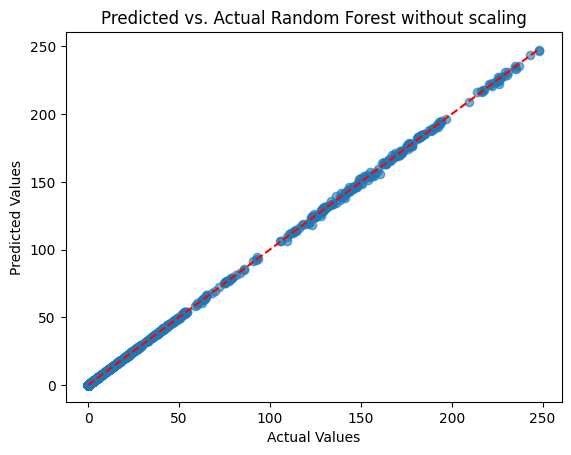

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Random Forest without scaling")
plt.show()

In [ ]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Performing grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", -grid_search.best_score_)

# Trainning with best parameters
best_rf_unscaled = grid_search.best_estimator_
y_pred = best_rf_unscaled.predict(x_test)

# Evaluation
mse= mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
print(f'rmse:{rmse}')
print(f"R-squared (R²): {r2_score(y_test, y_pred)}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.22142514584773074
rmse:0.42559062636669215
R-squared (R²): 0.999925707722821


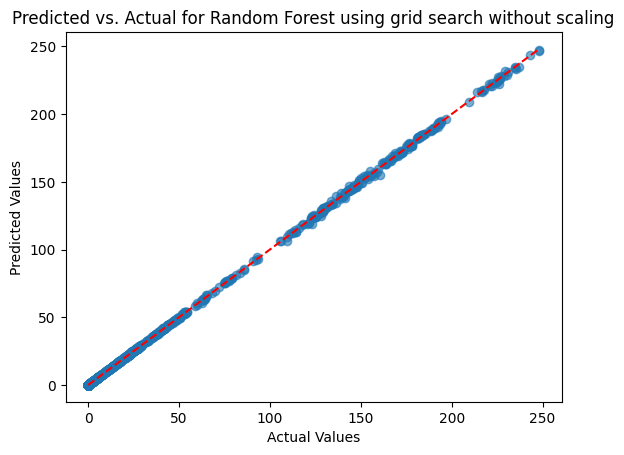

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual for Random Forest using grid search without scaling")
plt.show()

In [ ]:
# testing model performance on another dataset

#read dataset
# The dataset used is the Kaggle Tesla Stock Price With Indicators (10 Years)

df2=pd.read_csv('tsla_2014_2023.csv',usecols=['open','high','low','close'])
df2

,open,high,low,close
0,9.986667,10.165333,9.770000,10.006667
1,10.000000,10.146000,9.906667,9.970667
2,10.000000,10.026667,9.682667,9.800000
3,9.841333,10.026667,9.683333,9.957333
4,9.923333,10.246667,9.917333,10.085333
...,...,...,...,...
2511,256.760010,258.220001,251.369995,252.539993
2512,254.490005,257.970001,252.910004,256.609985
2513,258.350006,263.339996,257.519989,261.440002
2514,263.660004,265.130005,252.710007,253.179993


In [ ]:
#renaming columns to match initial dataset
df2=df2.rename(columns={'open':'Open','high':'High','low':'Low','close':'Close'})

In [ ]:
#sanity check
#checking for null values
df2.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0


In [ ]:
#checking for duplicates
df2.duplicated().sum()

0

In [ ]:
#checking for garbage values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
dtypes: float64(4)
memory usage: 78.8 KB


<Axes: >

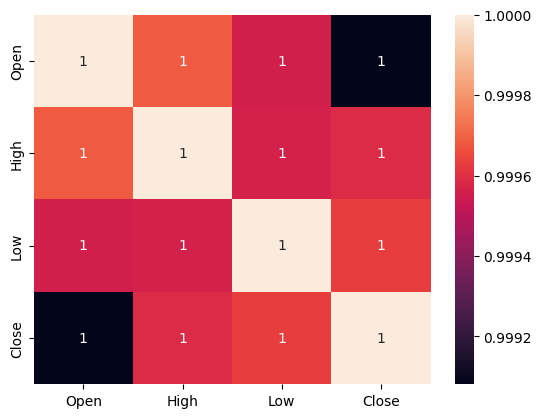

In [ ]:
#correlation
c=df2.select_dtypes('number').corr()
sns.heatmap(c,annot=True)

In [ ]:
#spliting columns
x_test_tsl =df2[['Open','High', 'Low']]
y_test_tsl =df2['Close']

In [ ]:
# using Random forest grid search model to predict

y_pred_tsl=best_rf_unscaled.predict(x_test_tsl)
best_rf_unscaled.score(x_test_tsl,y_test_tsl)

0.955934777953977

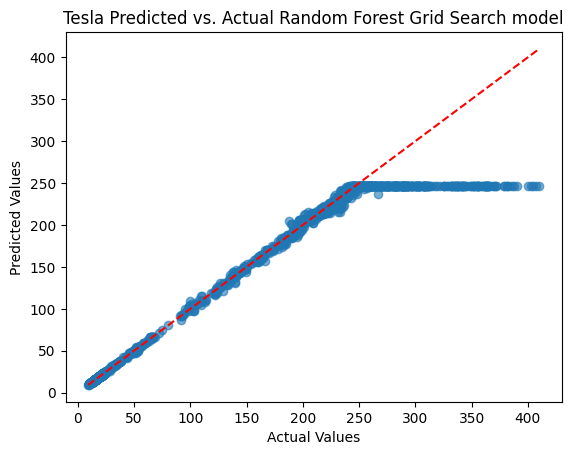

In [ ]:
plt.scatter(y_test_tsl, y_pred_tsl, alpha=0.6)
plt.plot([min(y_test_tsl), max(y_test_tsl)], [min(y_test_tsl), max(y_test_tsl)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Tesla Predicted vs. Actual Random Forest Grid Search model")
plt.show()

In [ ]:
# using random forest model to predict
y_pred_tsl=rf_model.predict(x_test_tsl)
rf_model.score(x_test_tsl,y_test_tsl)

0.9559129242220383

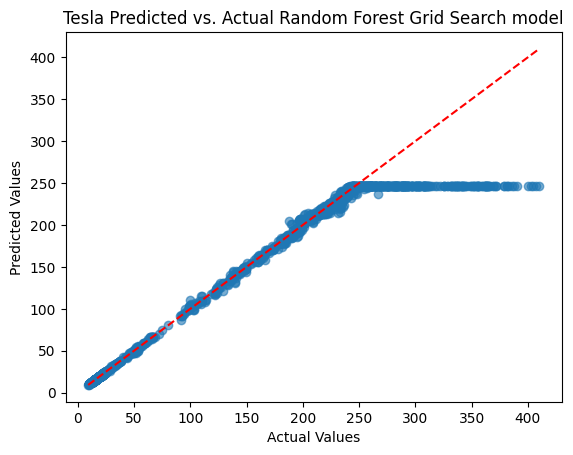

In [ ]:
plt.scatter(y_test_tsl, y_pred_tsl, alpha=0.6)
plt.plot([min(y_test_tsl), max(y_test_tsl)], [min(y_test_tsl), max(y_test_tsl)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Tesla Predicted vs. Actual Random Forest Grid Search model")
plt.show()

In [ ]:
# using linear regression model to predict
y_pred_tsl=reg_model_unscaled.predict(x_test_tsl)
reg_model_unscaled.score(x_test_tsl,y_test_tsl)

0.9996765494133174

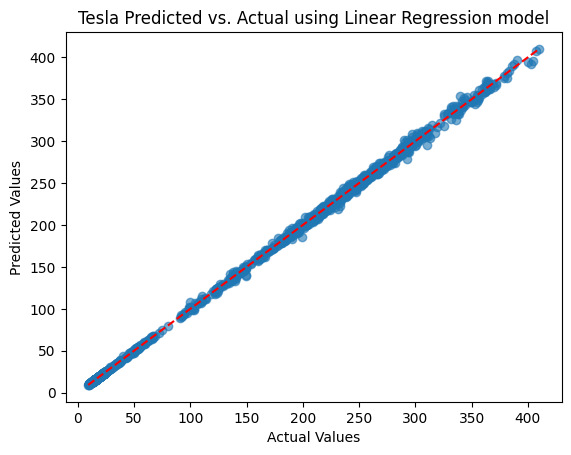

In [ ]:
plt.scatter(y_test_tsl, y_pred_tsl, alpha=0.6)
plt.plot([min(y_test_tsl), max(y_test_tsl)], [min(y_test_tsl), max(y_test_tsl)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Tesla Predicted vs. Actual using Linear Regression model")
plt.show()